# Objective: Predicting the likelihood of an employee churning from a company

- ### Data for current employee and employees that have left were provided in an excel format

### Importing the necessary libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

### Loading the data

In [55]:
ex_file = pd.ExcelFile('/Users/damil/Desktop/Data/ Python/Project/Employee_data.xlsx') # loading the whole excel file

In [56]:
df1 = pd.read_excel(ex_file,'Existing employees')
df2 = pd.read_excel(ex_file,'Employees who have left')

### Feature Engineering

In [57]:
df1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [58]:
df2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 11428 non-null  int64  
 1   satisfaction_level     11428 non-null  float64
 2   last_evaluation        11428 non-null  float64
 3   number_project         11428 non-null  int64  
 4   average_montly_hours   11428 non-null  int64  
 5   time_spend_company     11428 non-null  int64  
 6   Work_accident          11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   dept                   11428 non-null  object 
 9   salary                 11428 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 892.9+ KB


In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   int64  
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   int64  
 4   average_montly_hours   3571 non-null   int64  
 5   time_spend_company     3571 non-null   int64  
 6   Work_accident          3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


##### We can already see that the data is not balance

##### To train the algorithm, we need to combine both data. We cannot train an algorithm with data with just one outcome (Y)

##### Before that we need more feature engineering - adding status to both data

In [61]:
df1['status'] = 'Employed' # Employed - if the employee is still at the company

df2['status'] = 'Left'  # if the employee has left

In [62]:
df1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,Employed
1,2002,0.82,0.67,2,202,3,0,0,sales,low,Employed
2,2003,0.45,0.69,5,193,3,0,0,sales,low,Employed
3,2004,0.78,0.82,5,247,3,0,0,sales,low,Employed
4,2005,0.49,0.60,3,214,2,0,0,sales,low,Employed


In [63]:
df2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,Left
1,2,0.80,0.86,5,262,6,0,0,sales,medium,Left
2,3,0.11,0.88,7,272,4,0,0,sales,medium,Left
3,4,0.72,0.87,5,223,5,0,0,sales,low,Left
4,5,0.37,0.52,2,159,3,0,0,sales,low,Left


##### Now we can combine both dataframes

In [64]:
frames = [df1,df2]

df = pd.concat(frames)

In [65]:
df

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,Employed
1,2002,0.82,0.67,2,202,3,0,0,sales,low,Employed
2,2003,0.45,0.69,5,193,3,0,0,sales,low,Employed
3,2004,0.78,0.82,5,247,3,0,0,sales,low,Employed
4,2005,0.49,0.60,3,214,2,0,0,sales,low,Employed
...,...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,support,low,Left
3567,14996,0.37,0.48,2,160,3,0,0,support,low,Left
3568,14997,0.37,0.53,2,143,3,0,0,support,low,Left
3569,14998,0.11,0.96,6,280,4,0,0,support,low,Left


### Cleaning the data

In [66]:
df.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
status                   0
dtype: int64

##### No null values

In [67]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  status                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.4+ MB


##### Drop duplicate values

In [68]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,Employed
1,2002,0.82,0.67,2,202,3,0,0,sales,low,Employed
2,2003,0.45,0.69,5,193,3,0,0,sales,low,Employed
3,2004,0.78,0.82,5,247,3,0,0,sales,low,Employed
4,2005,0.49,0.60,3,214,2,0,0,sales,low,Employed


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  status                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.4+ MB


In [70]:
df.drop_duplicates(keep = 'first', inplace = True)

In [71]:
df.shape

(14999, 11)

### Exploring the data

array([[<AxesSubplot:title={'center':'Emp ID'}>,
        <AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>],
       [<AxesSubplot:title={'center':'number_project'}>,
        <AxesSubplot:title={'center':'average_montly_hours'}>,
        <AxesSubplot:title={'center':'time_spend_company'}>],
       [<AxesSubplot:title={'center':'Work_accident'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>,
        <AxesSubplot:>]], dtype=object)

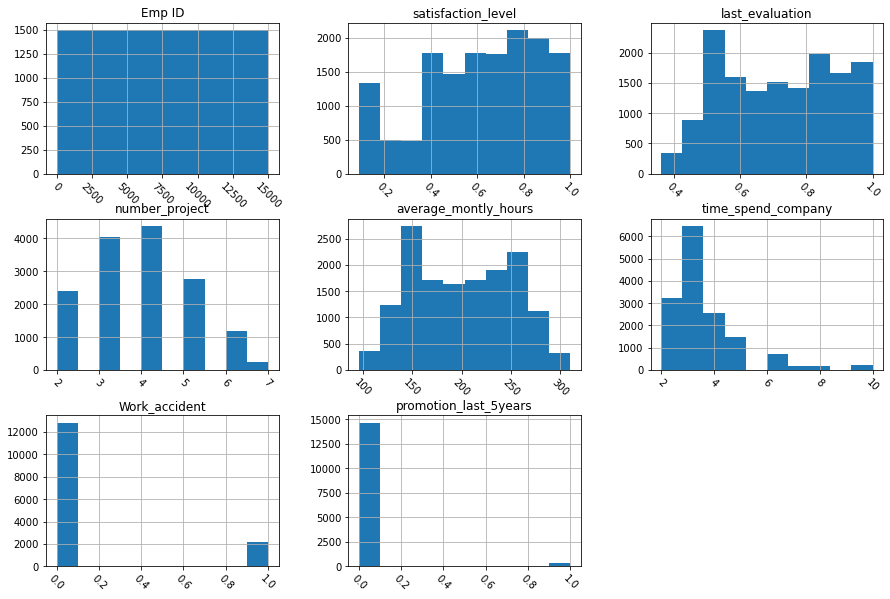

In [72]:
df.hist(figsize=(15,10), xrot=-45)

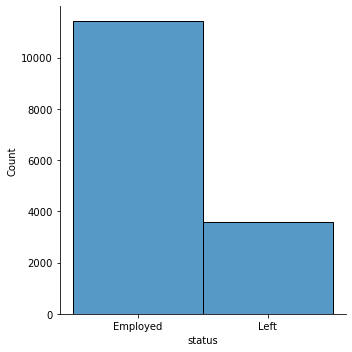

In [73]:
sns.displot(df['status'])

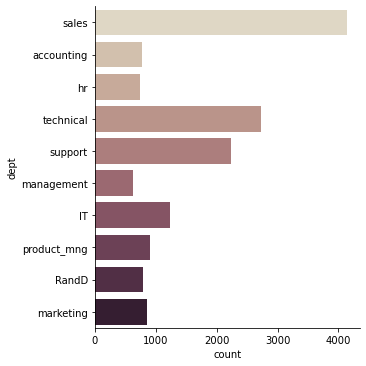

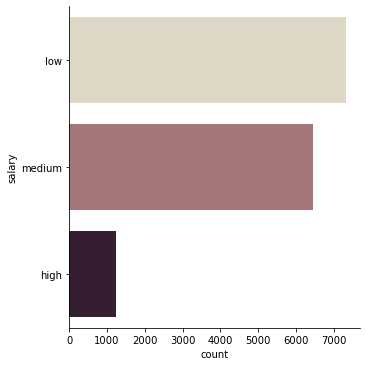

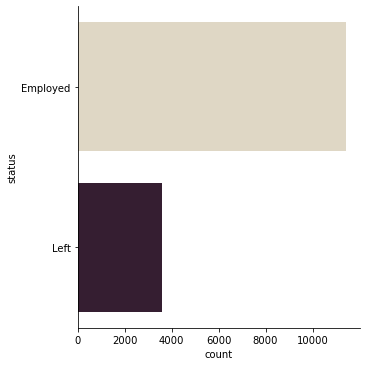

In [74]:
for x in df.dtypes[df.dtypes == 'object'].index:
    sns.catplot(data = df, y = '{}'.format(x), kind = 'count', palette='ch:.3')

##### The number of employees that have left the company is significantly less than the employees current employed. Since this is our target variable, the data is imbalanced and will have to deal with that later. Also, sales department has the highest number of employees and employees with high salaries are minority within the company

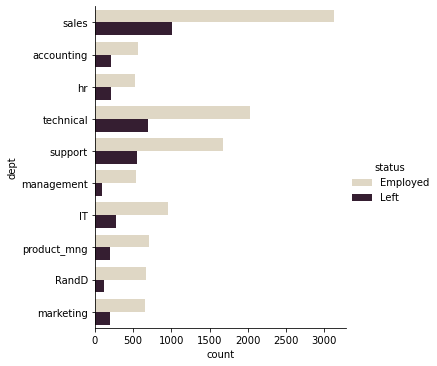

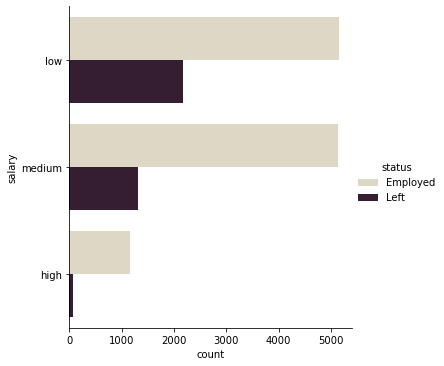

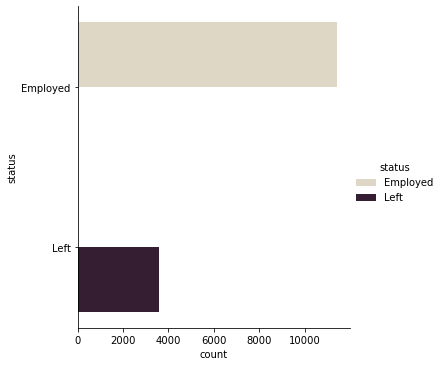

In [75]:
for x in df.dtypes[df.dtypes == 'object'].index:
    sns.catplot(data = df, y = '{}'.format(x), kind = 'count', palette='ch:.3', hue = 'status')

##### Low salaried employees have the highest number of employees leaving the company, and sales department has the highest number of churned employees

In [76]:
df_corr = df.corr()

In [77]:
df_corr

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Emp ID,1.000000,0.045841,-0.018168,-0.012124,-0.009850,0.144159,0.015931,0.088994
satisfaction_level,0.045841,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
last_evaluation,-0.018168,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
number_project,-0.012124,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,-0.009850,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
time_spend_company,0.144159,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,0.015931,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,0.088994,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


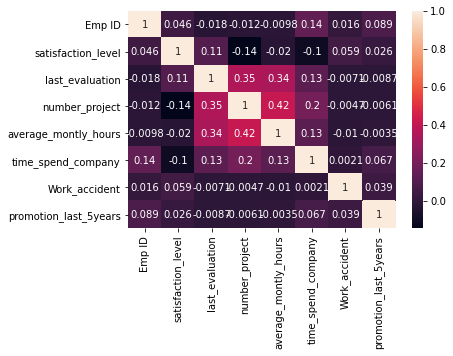

In [78]:
ax = sns.heatmap(df_corr, annot = True)

In [79]:
df

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,Employed
1,2002,0.82,0.67,2,202,3,0,0,sales,low,Employed
2,2003,0.45,0.69,5,193,3,0,0,sales,low,Employed
3,2004,0.78,0.82,5,247,3,0,0,sales,low,Employed
4,2005,0.49,0.60,3,214,2,0,0,sales,low,Employed
...,...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,support,low,Left
3567,14996,0.37,0.48,2,160,3,0,0,support,low,Left
3568,14997,0.37,0.53,2,143,3,0,0,support,low,Left
3569,14998,0.11,0.96,6,280,4,0,0,support,low,Left


- ##### There seems to be some correlation between 'number_project' and 'average_montly_hours'

- ##### There seems to be some correlation between 'number_project' and 'last_evaluation'


- ##### There seems to be some correlation between 'average_montly_hours' and 'last_evaluation'


In [80]:
df.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'status'],
      dtype='object')

<AxesSubplot:xlabel='number_project', ylabel='status'>

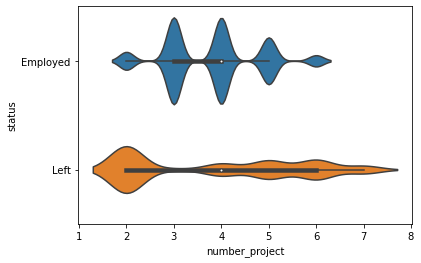

In [81]:
sns.violinplot(y = 'status', x ='number_project', data = df)

##### It seems the optimum number of projects is around 3. We see alot of employees leaving when they have projects below 3 and above 4. 

<AxesSubplot:xlabel='last_evaluation', ylabel='status'>

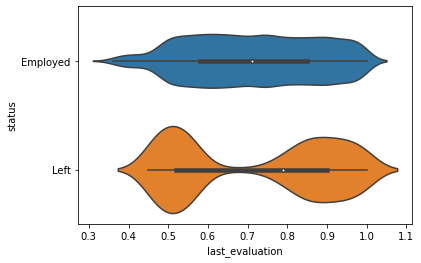

In [82]:
sns.violinplot(y = 'status', x ='last_evaluation', data = df)

##### Both employees with high evaluation and low evaluation still left the company suggesting that this alone can not be the factor for leaving

<AxesSubplot:xlabel='average_montly_hours', ylabel='status'>

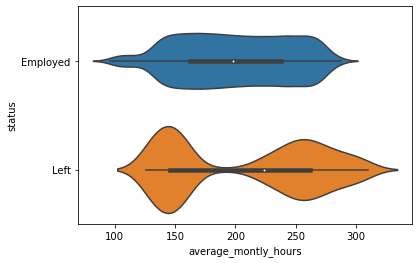

In [83]:
sns.violinplot(y = 'status', x ='average_montly_hours', data = df)

### Encoding

- ###### Dependent Variable: We can code this with binary since its either "left" or "Employed"

- ###### Independent Variables: One hot coding

In [84]:
col = ['salary', 'dept'] # Independent variables(Object)

df_enc = pd.get_dummies(df, columns = col, drop_first=True) # One hot encoding for the independent variables

df_enc['status'] = pd.get_dummies(df_enc.status).Left # Encoding as binaries

In [85]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   status                 14999 non-null  uint8  
 9   salary_low             14999 non-null  uint8  
 10  salary_medium          14999 non-null  uint8  
 11  dept_RandD             14999 non-null  uint8  
 12  dept_accounting        14999 non-null  uint8  
 13  dept_hr                14999 non-null  uint8  
 14  dept_management        14999 non-null  uint8  
 15  dep

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  status                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.6+ MB


In [87]:
df_enc

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,status,salary_low,salary_medium,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,2001,0.58,0.74,4,215,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,2002,0.82,0.67,2,202,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,2003,0.45,0.69,5,193,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2004,0.78,0.82,5,247,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2005,0.49,0.60,3,214,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,1,1,0,0,0,0,0,0,0,0,1,0
3567,14996,0.37,0.48,2,160,3,0,0,1,1,0,0,0,0,0,0,0,0,1,0
3568,14997,0.37,0.53,2,143,3,0,0,1,1,0,0,0,0,0,0,0,0,1,0
3569,14998,0.11,0.96,6,280,4,0,0,1,1,0,0,0,0,0,0,0,0,1,0


### Building the model

In [88]:
# Declaring Independent and dependent variables
x = df_enc.drop('status', axis = 1) # defining the independent variables
y = df_enc['status'] # target variables

### importing neccessary libraries

In [110]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV # to split our data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression # We dont need this, but just wanna see what it looks like
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

### We still have to deal with the imbalance dataset

In [90]:
from imblearn.over_sampling import SMOTE

In [91]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [92]:
from imblearn.over_sampling import SMOTE

##### Now we can oversample the underclass

In [93]:
sm = SMOTE(random_state = 101) # creating an object
x_resampled, y_resampled = sm.fit_resample(x,y)

In [94]:
x.shape

(14999, 19)

In [95]:
x_resampled.shape

(22856, 19)

In [96]:
y_resampled.shape

(22856,)

#### Splitting into train and test

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 12)

#### Since the target variable is descrete, we will be testing various classification algorithms

In [100]:
models = [] # an empty list for the models
models.append(('LR', LogisticRegression())) 
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('XGB',XGBClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GB', GaussianNB())) 


# Result performance
results = []

# Evaluation metric

scoring  = 'roc_auc'

# name of models for i in seq

names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 7, shuffle = True) # for cross validation
    cv_results = cross_val_score(model,x_resampled,y_resampled, cv =kfold, scoring =scoring)
    #results = results.append(cv_results)
    names.append(name)
    
    print (f"{name} roc: {cv_results.mean()} std-error:{cv_results.std()}")

/Users/damil/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/damil/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

LR roc: 0.8343823230575262 std-error:0.013999681052464087
RF roc: 0.9999881657727467 std-error:2.5792209260897818e-05
SVM roc: 0.9410775715521291 std-error:0.005662363615539994
KNN roc: 0.9999994639283564 std-error:1.016129457448246e-06
XGB roc: 0.9999945648179981 std-error:1.1215444274715517e-05
DT roc: 0.9965875051520486 std-error:0.0022630721460924555
GB roc: 0.9189574250653981 std-error:0.005162072698887099


##### Various models performed well with an roc score of 0.999..., but KNN gave the best result because it has the lowest standard error

### create an algorithm

#### KNeighbors

In [107]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [108]:
print(f"Train score: {knn.score(x_train,y_train)} --- Test score: {knn.score(x_test,y_test)}")

Train score: 0.9995624589805294 --- Test score: 0.9993438320209974


In [112]:
knn_prediction = knn.predict(x_test)
accuracy_score(knn_prediction,y_test)

print(classification_report(knn_prediction,y_test))
print(confusion_matrix(knn_prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      2254

    accuracy                           1.00      4572
   macro avg       1.00      1.00      1.00      4572
weighted avg       1.00      1.00      1.00      4572

[[2318    0]
 [   3 2251]]


##### 4572 tests
- The model accurately classified 2251 employees as "Left" (True Positive) at the company, and no false negative(Type 2 error)
- The model classified 2318 employees as "Employed" (True Negative) and got 3 wrong (False positive - Type 1 errors)

#### XG boost

In [103]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [104]:
print(f"Train score: {xgb.score(x_train,y_train)} --- Test score: {xgb.score(x_test,y_test)}")

Train score: 1.0 --- Test score: 0.9997812773403325


In [113]:
xgb_prediction = xgb.predict(x_test)
accuracy_score(xgb_prediction,y_test)

print(classification_report(xgb_prediction,y_test))
print(confusion_matrix(xgb_prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2320
           1       1.00      1.00      1.00      2252

    accuracy                           1.00      4572
   macro avg       1.00      1.00      1.00      4572
weighted avg       1.00      1.00      1.00      4572

[[2320    0]
 [   1 2251]]


##### 4572 tests
- The model accurately classified 2251 employees as "Left" (True Positive) at the company, and no false negative(Type 2 error)
- The model classified 2320 employees as "Employed" (True Negative) and got 1 wrong (False positive - Type 1 errors)

##### Random Forest

In [105]:
rf =  RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [106]:
print(f"Train score: {rf.score(x_train,y_train)} --- Test score: {rf.score(x_test,y_test)}")

Train score: 1.0 --- Test score: 0.9984689413823272


In [114]:
rf_prediction = rf.predict(x_test)
accuracy_score(rf_prediction,y_test)

print(classification_report(rf_prediction,y_test))
print(confusion_matrix(rf_prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2324
           1       1.00      1.00      1.00      2248

    accuracy                           1.00      4572
   macro avg       1.00      1.00      1.00      4572
weighted avg       1.00      1.00      1.00      4572

[[2319    5]
 [   2 2246]]


##### 4572 tests
- The model accurately classified 2246 employees as "Left" (True Positive) at the company, and got 5 wrong - false negative(Type 2 error)
- The model classified 2319 employees as "Employed" (True Negative) and got 2 wrong (False positive - Type 1 errors)

### Conclusion
The objective of this project require that we are able to accurately predict employees that will leave the company, and that mean reducing false postive and false negative. Of the 3 models, XGB Classifier seem to be the best performing model as it has the lowest errors.

We could attempt to make the other models better by tuning the hyper parameters, but we will XGB Classifier seems to be performing well.